/tmp/ipython-input-290208140.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2015-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training RNN Model...

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0306
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8977e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8053e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8540e-04
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1585e-04
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8070e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2424e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3799e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7831e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9303e-04

Training LSTM Model...

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0171
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3613e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6878e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

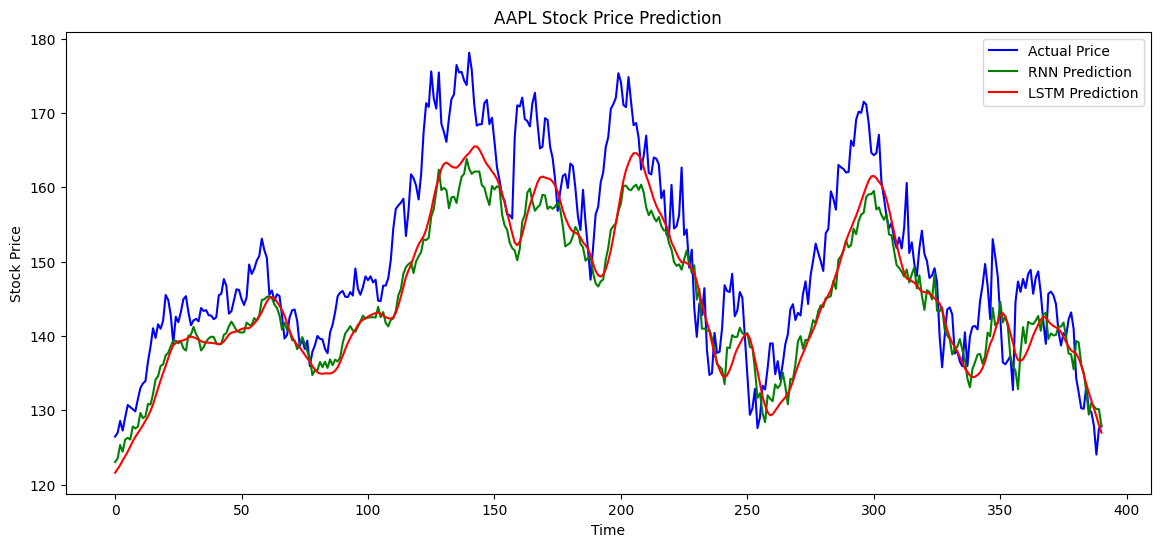

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Next Day Predicted Price (LSTM): 126.21587


In [1]:
# ===============================
# Stock Price Prediction using RNN & LSTM
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

# ===============================
# 1. Download Stock Data
# ===============================

stock_symbol = 'AAPL'   # Change to any stock like 'TSLA', 'GOOG'
data = yf.download(stock_symbol, start='2015-01-01', end='2023-01-01')

data = data[['Close']]

# ===============================
# 2. Data Preprocessing
# ===============================

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

X = []
y = []

time_steps = 60   # Use past 60 days

for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# ===============================
# 3. Train-Test Split
# ===============================

train_size = int(len(X) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

# ===============================
# 4. Build RNN Model
# ===============================

rnn_model = Sequential()

rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X.shape[1],1)))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

print("\nTraining RNN Model...\n")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# ===============================
# 5. Build LSTM Model
# ===============================

lstm_model = Sequential()

lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

print("\nTraining LSTM Model...\n")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# ===============================
# 6. Predictions
# ===============================

rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)

# Inverse scaling
rnn_predictions = scaler.inverse_transform(rnn_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# ===============================
# 7. Calculate RMSE
# ===============================

rnn_rmse = np.sqrt(mean_squared_error(y_test_actual, rnn_predictions))
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))

print("\nRNN RMSE:", rnn_rmse)
print("LSTM RMSE:", lstm_rmse)

# ===============================
# 8. Plot Results
# ===============================

plt.figure(figsize=(14,6))

plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(rnn_predictions, color='green', label='RNN Prediction')
plt.plot(lstm_predictions, color='red', label='LSTM Prediction')

plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# ===============================
# 9. Predict Next Day Price (Using LSTM)
# ===============================

last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1,60,1))

next_day_prediction = lstm_model.predict(last_60_days)
next_day_prediction = scaler.inverse_transform(next_day_prediction)

print("\nNext Day Predicted Price (LSTM):", next_day_prediction[0][0])